## Logistic Regression

### `로지스틱(Logistic) 회귀분석`
- 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제 모두 사용 가능
- 로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따르고, 그 모수가 독립변수 x에 의존한다고 가정함

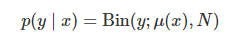


- 로지스틱 함수는 y값이 특정한 구간 내의 값(0~N)만 가질 수 있기 때문에, 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있음
- 이항 분포의 특별한 경우(N=1)로 y가 베르누이 확률 분포인 경우도 있을 수 있음 (여기서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려)

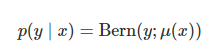

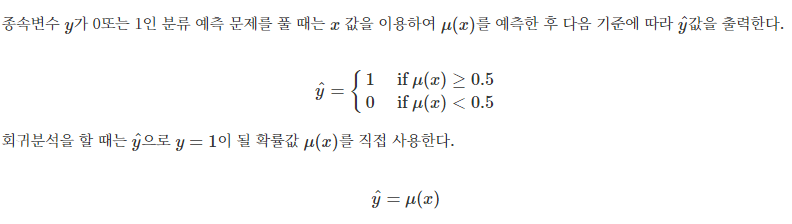

<데이터 자료의 형태>
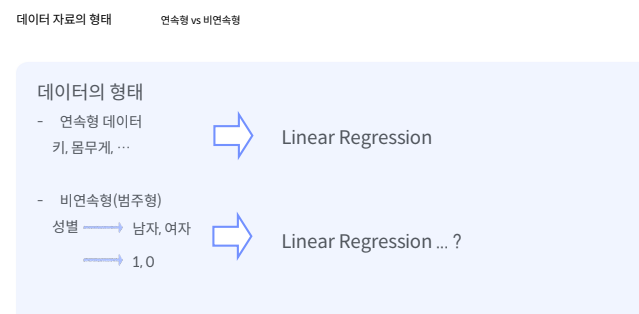
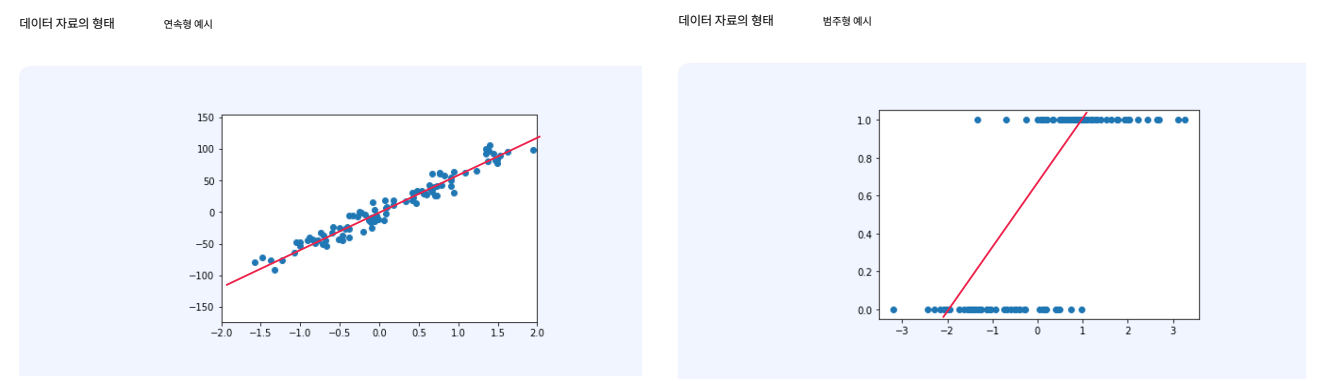
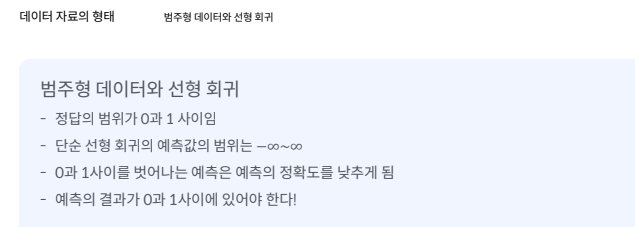
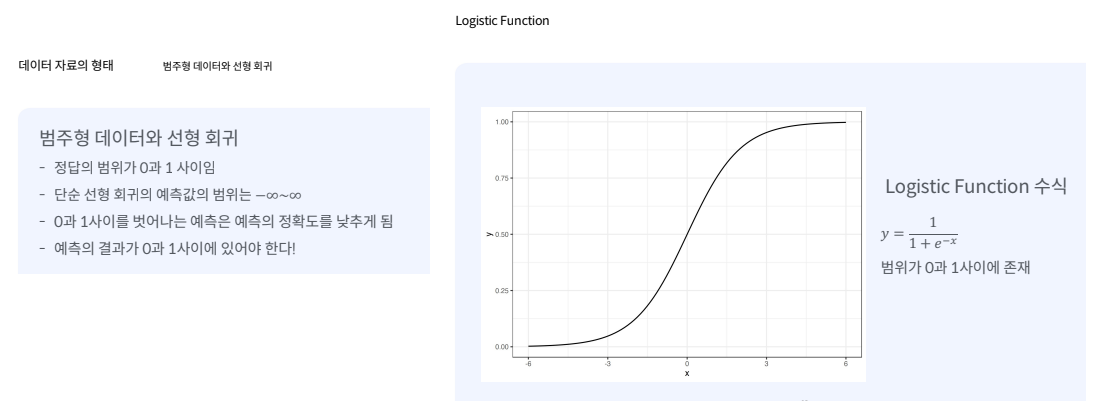

[Logistic Regression의 정의]
- Linear Regression + Logistic Function
- 정답이 범주형일 때 사용하는 Regression Model

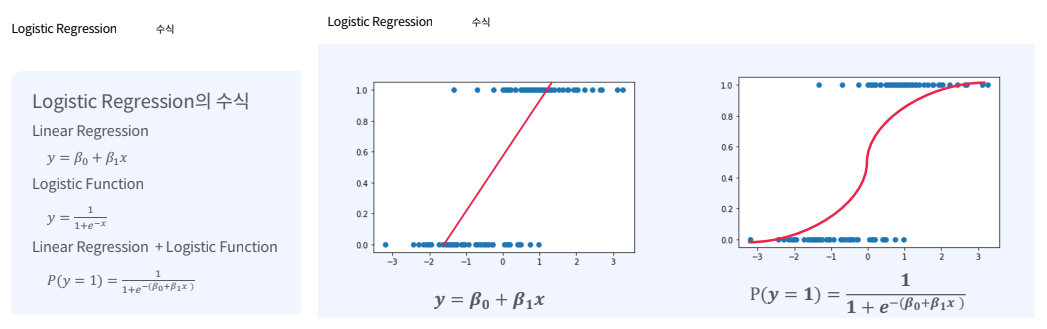

[Threshold의 정의]
- 확률값을 범주형으로 변환할 때의 기준
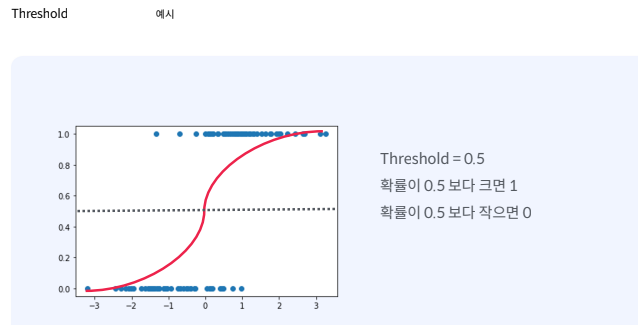
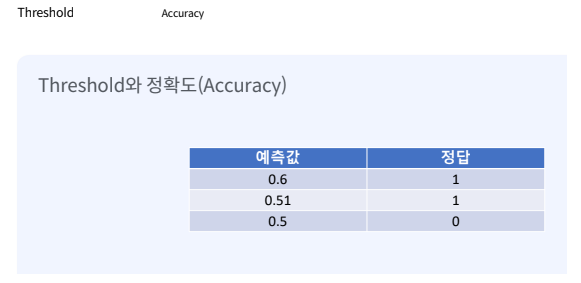

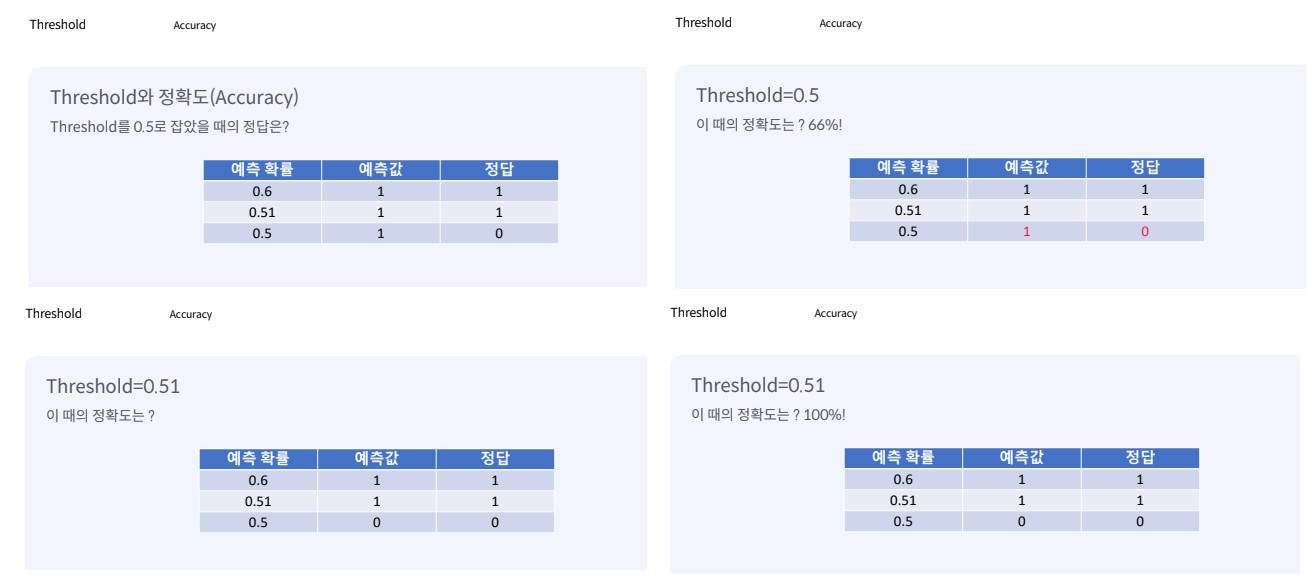

[AUROC]

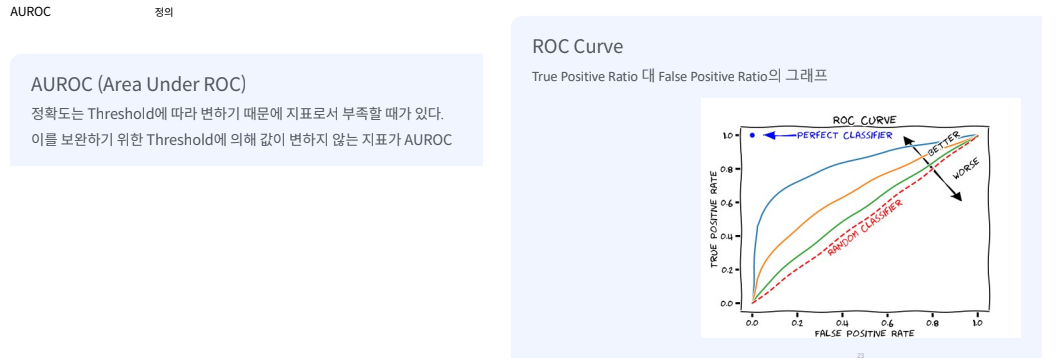

[Confusion Matrix]
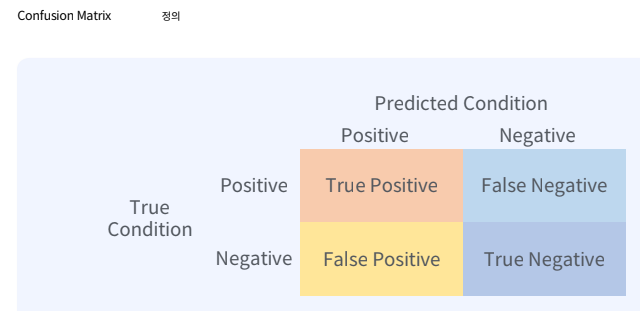
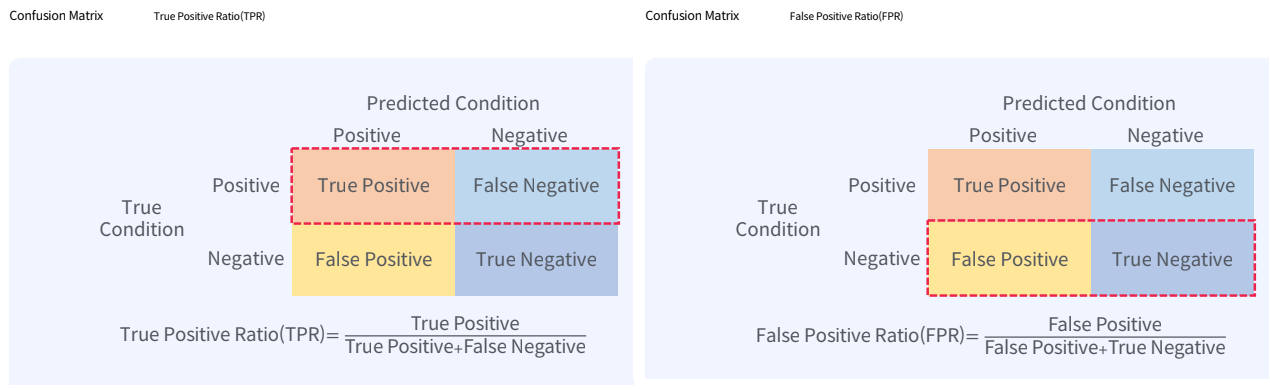

In [1]:
import pandas as pd
import numpy as np

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


### 로지스틱 회귀 결정 경계

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [7]:
print(iris['data'][:5])
print(iris['target'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [9]:
(iris['target']==2).astype(np.int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target'] ==2).astype(np.int) # Iris-Virginica면 1, 그렇지 않으면 0

#### 로지스틱 회귀모델 훈련

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [19]:
import matplotlib.pyplot as plt

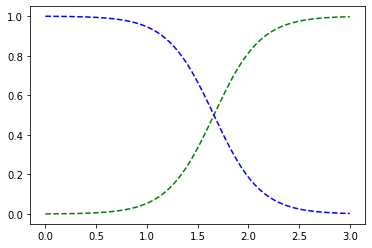

In [20]:
# 꽃잎의 너비가 0-3cm 인 꽃에 대한 모델 추정 확률 계산

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g--', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')

In [22]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [23]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])